# Data Cleaning


## Import & Load


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

# Set display options
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)

# Set style for visualizations
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (12, 6)

In [2]:
# Load the dataset
df = pd.read_csv('/Users/bikki/Documents/Projects_Spring_2026/STATS201/Assets/Life Expectancy Data.csv')

print(f"Dataset shape: {df.shape}")
print(f"\nNumber of observations: {df.shape[0]}")
print(f"Number of features: {df.shape[1]}")

Dataset shape: (2938, 22)

Number of observations: 2938
Number of features: 22


In [3]:
# Country - Name of the country being observed.
# Year - Year in which the data was recorded.
# Status - Classification of the country as Developed or Developing.
# Life expectancy - Average number of years a newborn is expected to live.
# Adult Mortality - Probability of dying between ages 15 and 60 per 1000 population.
# infant deaths - Total number of infant deaths (under age 1) in that year.
# Alcohol - Average alcohol consumption per person (liters per capita, age 15+).
# percentage expenditure - Health expenditure as a percentage of GDP per capita.
# Hepatitis B - Percentage of 1-year-olds immunized against Hepatitis B.
# Measles - Total number of reported measles cases in that year.
# BMI - Average Body Mass Index of the population.
# under-five deaths - Total number of deaths of children under age 5 in that year.
# Polio - Percentage of children immunized against Polio.
# Total expenditure - Government health spending as a percentage of total expenditure.
# Diphtheria - Percentage of children immunized against DTP3 (diphtheria/tetanus/pertussis).
# HIV/AIDS - Death rate per 1000 population due to HIV/AIDS in young children (0–4 years).
# GDP - Gross Domestic Product per capita in US dollars.
# Population - Total population of the country in that year.
# thinness 1-19 years - Percentage of adolescents aged 10–19 who are underweight.
# thinness 5-9 years - Percentage of children aged 5–9 who are underweight.
# Income composition of resources - Index (0–1) measuring access to income and resources.
# Schooling - Average number of years of schooling for adults aged 25+.

## Initial Exploration


In [4]:
# Display first few rows
df.head(10)

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,19.1,83,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,18.6,86,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,18.1,89,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,17.6,93,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,17.2,97,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5
5,Afghanistan,2010,Developing,58.8,279.0,74,0.01,79.679367,66.0,1989,16.7,102,66.0,9.20,66.0,0.1,553.328940,2883167.0,18.4,18.4,0.448,9.2
6,Afghanistan,2009,Developing,58.6,281.0,77,0.01,56.762217,63.0,2861,16.2,106,63.0,9.42,63.0,0.1,445.893298,284331.0,18.6,18.7,0.434,8.9
7,Afghanistan,2008,Developing,58.1,287.0,80,0.03,25.873925,64.0,1599,15.7,110,64.0,8.33,64.0,0.1,373.361116,2729431.0,18.8,18.9,0.433,8.7
8,Afghanistan,2007,Developing,57.5,295.0,82,0.02,10.910156,63.0,1141,15.2,113,63.0,6.73,63.0,0.1,369.835796,26616792.0,19.0,19.1,0.415,8.4
9,Afghanistan,2006,Developing,57.3,295.0,84,0.03,17.171518,64.0,1990,14.7,116,58.0,7.43,58.0,0.1,272.563770,2589345.0,19.2,19.3,0.405,8.1


In [5]:
# Column names and data types
print("Column Information:")
df.info()

Column Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          2938 non-null   object 
 1   Year                             2938 non-null   int64  
 2   Status                           2938 non-null   object 
 3   Life expectancy                  2928 non-null   float64
 4   Adult Mortality                  2928 non-null   float64
 5   infant deaths                    2938 non-null   int64  
 6   Alcohol                          2744 non-null   float64
 7   percentage expenditure           2938 non-null   float64
 8   Hepatitis B                      2385 non-null   float64
 9   Measles                          2938 non-null   int64  
 10   BMI                             2904 non-null   float64
 11  under-five deaths                2938 non-null   int64  
 12  

In [6]:
# Check for spaces in column names and standardize
print("Original column names:")
print(df.columns.tolist())

# Clean column names - remove leading/trailing spaces
df.columns = df.columns.str.strip()

print("\nCleaned column names:")
print(df.columns.tolist())

Original column names:
['Country', 'Year', 'Status', 'Life expectancy ', 'Adult Mortality', 'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B', 'Measles ', ' BMI ', 'under-five deaths ', 'Polio', 'Total expenditure', 'Diphtheria ', ' HIV/AIDS', 'GDP', 'Population', ' thinness  1-19 years', ' thinness 5-9 years', 'Income composition of resources', 'Schooling']

Cleaned column names:
['Country', 'Year', 'Status', 'Life expectancy', 'Adult Mortality', 'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B', 'Measles', 'BMI', 'under-five deaths', 'Polio', 'Total expenditure', 'Diphtheria', 'HIV/AIDS', 'GDP', 'Population', 'thinness  1-19 years', 'thinness 5-9 years', 'Income composition of resources', 'Schooling']


In [7]:
# Basic statistics
df.describe()

,Year,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
count,2938.000000,2928.000000,2928.000000,2938.000000,2744.000000,2938.000000,2385.000000,2938.000000,2904.000000,2938.000000,2919.000000,2712.00000,2919.000000,2938.000000,2490.000000,2.286000e+03,2904.000000,2904.000000,2771.000000,2775.000000
mean,2007.518720,69.224932,164.796448,30.303948,4.602861,738.251295,80.940461,2419.592240,38.321247,42.035739,82.550188,5.93819,82.324084,1.742103,7483.158469,1.275338e+07,4.839704,4.870317,0.627551,11.992793
std,4.613841,9.523867,124.292079,117.926501,4.052413,1987.914858,25.070016,11467.272489,20.044034,160.445548,23.428046,2.49832,23.716912,5.077785,14270.169342,6.101210e+07,4.420195,4.508882,0.210904,3.358920
min,2000.000000,36.300000,1.000000,0.000000,0.010000,0.000000,1.000000,0.000000,1.000000,0.000000,3.000000,0.37000,2.000000,0.100000,1.681350,3.400000e+01,0.100000,0.100000,0.000000,0.000000
25%,2004.000000,63.100000,74.000000,0.000000,0.877500,4.685343,77.000000,0.000000,19.300000,0.000000,78.000000,4.26000,78.000000,0.100000,463.935626,1.957932e+05,1.600000,1.500000,0.493000,10.100000
50%,2008.000000,72.100000,144.000000,3.000000,3.755000,64.912906,92.000000,17.000000,43.500000,4.000000,93.000000,5.75500,93.000000,0.100000,1766.947595,1.386542e+06,3.300000,3.300000,0.677000,12.300000
75%,2012.000000,75.700000,228.000000,22.000000,7.702500,441.534144,97.000000,360.250000,56.200000,28.000000,97.000000,7.49250,97.000000,0.800000,5910.806335,7.420359e+06,7.200000,7.200000,0.779000,14.300000
max,2015.000000,89.000000,723.000000,1800.000000,17.870000,19479.911610,99.000000,212183.000000,87.300000,2500.000000,99.000000,17.60000,99.000000,50.600000,119172.741800,1.293859e+09,27.700000,28.600000,0.948000,20.700000


In [8]:
# Check unique values for categorical variables
print("Categorical Variable Summary:")
print(f"\nCountries: {df['Country'].nunique()}")
print(f"Years: {sorted(df['Year'].unique())}")
print(f"Status: {df['Status'].unique()}")
print(f"\nCountry distribution (top 10):")
print(df['Country'].value_counts().head(10))

Categorical Variable Summary:

Countries: 193
Years: [np.int64(2000), np.int64(2001), np.int64(2002), np.int64(2003), np.int64(2004), np.int64(2005), np.int64(2006), np.int64(2007), np.int64(2008), np.int64(2009), np.int64(2010), np.int64(2011), np.int64(2012), np.int64(2013), np.int64(2014), np.int64(2015)]
Status: ['Developing' 'Developed']

Country distribution (top 10):
Country
Afghanistan         16
Peru                16
Nicaragua           16
Niger               16
Nigeria             16
Norway              16
Oman                16
Pakistan            16
Panama              16
Papua New Guinea    16
Name: count, dtype: int64


## Missing Values


In [9]:
# Calculate missing values
missing_data = pd.DataFrame({
    'Column': df.columns,
    'Missing_Count': df.isnull().sum(),
    'Missing_Percentage': (df.isnull().sum() / len(df) * 100).round(2)
}).sort_values('Missing_Count', ascending=False)

missing_data = missing_data[missing_data['Missing_Count'] > 0]

print("Missing Value Summary:")
print(missing_data.to_string(index=False))

Missing Value Summary:
                         Column  Missing_Count  Missing_Percentage
                     Population            652               22.19
                    Hepatitis B            553               18.82
                            GDP            448               15.25
              Total expenditure            226                7.69
                        Alcohol            194                6.60
Income composition of resources            167                5.68
                      Schooling            163                5.55
             thinness 5-9 years             34                1.16
           thinness  1-19 years             34                1.16
                            BMI             34                1.16
                          Polio             19                0.65
                     Diphtheria             19                0.65
                Life expectancy             10                0.34
                Adult Mortality        

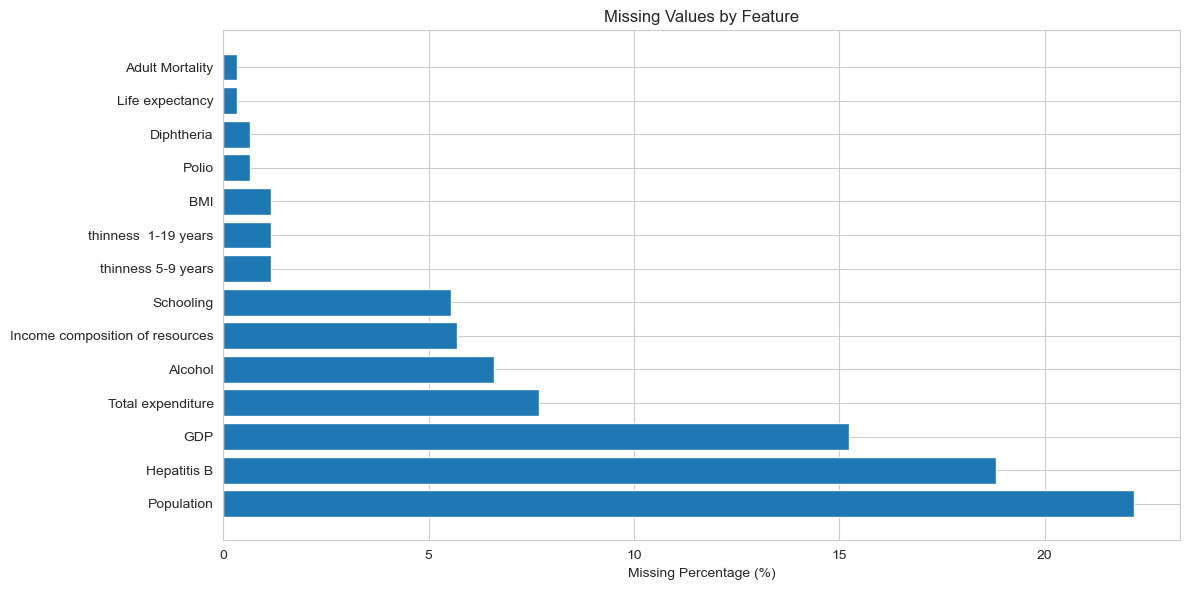

In [10]:
# Visualize missing values
if len(missing_data) > 0:
    plt.figure(figsize=(12, 6))
    plt.barh(missing_data['Column'], missing_data['Missing_Percentage'])
    plt.xlabel('Missing Percentage (%)')
    plt.title('Missing Values by Feature')
    plt.tight_layout()
    plt.savefig('/Users/bikki/Documents/Projects_Spring_2026/STATS201/images/missing_values.png', dpi=300, bbox_inches='tight')
    plt.show()

In [11]:
# Check target variable (Life expectancy) missing values
target_missing = df['Life expectancy'].isnull().sum()
print(f"Target variable (Life expectancy) missing values: {target_missing}")
print(f"Percentage: {(target_missing / len(df) * 100):.2f}%")

Target variable (Life expectancy) missing values: 10
Percentage: 0.34%


## Cleaning Steps


In [12]:
# Create a copy for cleaning
df_clean = df.copy()

print(f"Starting with {len(df_clean)} observations")

Starting with 2938 observations


### Remove Missing Target


In [13]:
# Remove rows where target variable is missing
rows_before = len(df_clean)
df_clean = df_clean.dropna(subset=['Life expectancy'])
rows_removed = rows_before - len(df_clean)

print(f"Removed {rows_removed} rows with missing Life expectancy")
print(f"Remaining observations: {len(df_clean)}")

Removed 10 rows with missing Life expectancy
Remaining observations: 2928


### Missing Predictors


In [14]:
# NOTE: Imputation is deferred to model training to avoid leakage across time.
# We'll keep missing values here and fit imputers using training years only.

numerical_cols = df_clean.select_dtypes(include=[np.number]).columns.tolist()
print(f"Numerical columns with missing values: {(df_clean[numerical_cols].isnull().sum() > 0).sum()}")
print(f"Total missing values (all columns): {df_clean.isnull().sum().sum()}")


Numerical columns with missing values: 12
Total missing values (all columns): 2513


### Duplicates


In [15]:
# Check for duplicate rows based on Country and Year
duplicates = df_clean.duplicated(subset=['Country', 'Year'], keep=False)
print(f"Duplicate Country-Year pairs: {duplicates.sum()}")

if duplicates.sum() > 0:
    print("\nDuplicate entries:")
    print(df_clean[duplicates].sort_values(['Country', 'Year']))
    
    # Keep first occurrence and remove duplicates
    df_clean = df_clean.drop_duplicates(subset=['Country', 'Year'], keep='first')
    print(f"\nRemoved {duplicates.sum() - df_clean.duplicated(subset=['Country', 'Year']).sum()} duplicate rows")

print(f"\nFinal dataset size: {len(df_clean)} observations")

Duplicate Country-Year pairs: 0

Final dataset size: 2928 observations


### Target Outliers


In [16]:
# Detect outliers in life expectancy using IQR method
Q1 = df_clean['Life expectancy'].quantile(0.25)
Q3 = df_clean['Life expectancy'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 3 * IQR  # Using 3*IQR for more conservative outlier detection
upper_bound = Q3 + 3 * IQR

outliers = df_clean[(df_clean['Life expectancy'] < lower_bound) | 
                    (df_clean['Life expectancy'] > upper_bound)]

print(f"Life expectancy range: {df_clean['Life expectancy'].min():.1f} - {df_clean['Life expectancy'].max():.1f}")
print(f"Outlier bounds: {lower_bound:.1f} - {upper_bound:.1f}")
print(f"Number of outliers detected: {len(outliers)}")

if len(outliers) > 0:
    print("\nOutlier examples:")
    print(outliers[['Country', 'Year', 'Life expectancy', 'Status']].head(10))

Life expectancy range: 36.3 - 89.0
Outlier bounds: 25.3 - 113.5
Number of outliers detected: 0


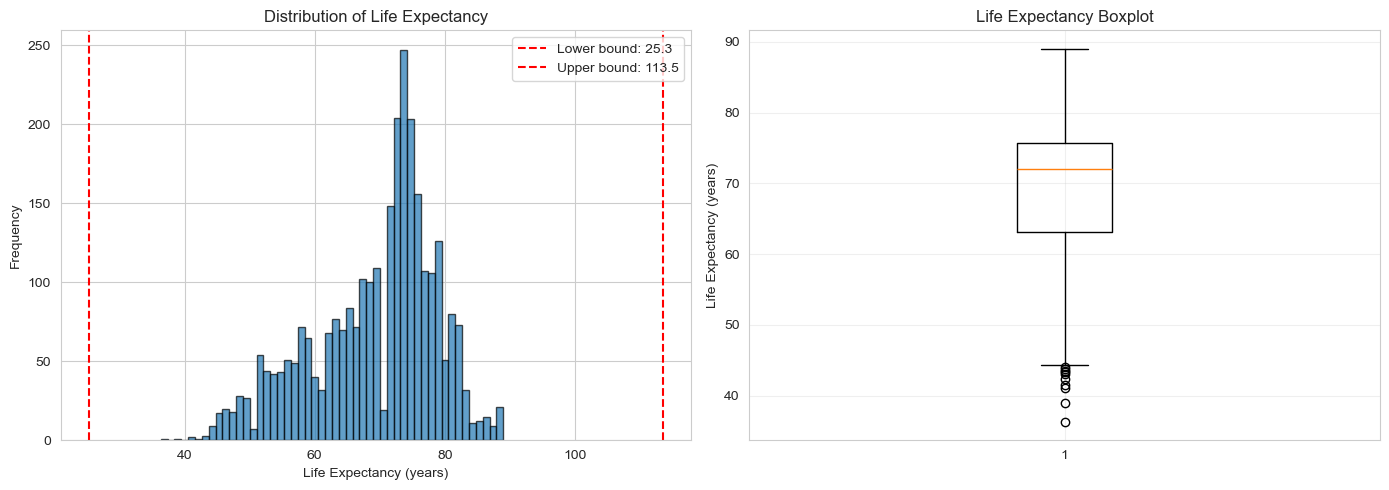

In [17]:
# Visualize target variable distribution
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Histogram
axes[0].hist(df_clean['Life expectancy'], bins=50, edgecolor='black', alpha=0.7)
axes[0].axvline(lower_bound, color='red', linestyle='--', label=f'Lower bound: {lower_bound:.1f}')
axes[0].axvline(upper_bound, color='red', linestyle='--', label=f'Upper bound: {upper_bound:.1f}')
axes[0].set_xlabel('Life Expectancy (years)')
axes[0].set_ylabel('Frequency')
axes[0].set_title('Distribution of Life Expectancy')
axes[0].legend()

# Boxplot
axes[1].boxplot(df_clean['Life expectancy'], vert=True)
axes[1].set_ylabel('Life Expectancy (years)')
axes[1].set_title('Life Expectancy Boxplot')
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('/Users/bikki/Documents/Projects_Spring_2026/STATS201/images/life_expectancy_distribution.png', dpi=300, bbox_inches='tight')
plt.show()

### Encode Status


In [18]:
# Encode Status as binary variable (Developed = 1, Developing = 0)
df_clean['Status_Encoded'] = (df_clean['Status'] == 'Developed').astype(int)

print("Status encoding:")
print(df_clean[['Status', 'Status_Encoded']].drop_duplicates())
print(f"\nDistribution:")
print(df_clean['Status'].value_counts())

Status encoding:
         Status  Status_Encoded
0    Developing               0
112   Developed               1

Distribution:
Status
Developing    2416
Developed      512
Name: count, dtype: int64


### Time Series Features


In [19]:
# IMPORTANT: Sort data by Country and Year for time series feature creation
print("Sorting data by Country and Year for time series features...")
df_clean = df_clean.sort_values(['Country', 'Year']).reset_index(drop=True)

print(f"\nDataset shape before time series features: {df_clean.shape}")
before_cols = df_clean.shape[1]

# 1. Create Years_Since_2000 (temporal feature)
df_clean['Years_Since_2000'] = df_clean['Year'] - 2000

# 2. Create lagged features for Life Expectancy (key for time series prediction)
print("Creating lagged life expectancy features...")
for lag in [1, 2, 3]:
    df_clean[f'Life_Expectancy_Lag_{lag}'] = df_clean.groupby('Country')['Life expectancy'].shift(lag)

# 3. Create rolling averages using past values only (no current-year leakage)
print("Creating rolling average features (past-only)...")
for window in [3, 5]:
    df_clean[f'Life_Expectancy_RollingMean_{window}yr'] = (
        df_clean.groupby('Country')['Life expectancy']
        .shift(1)
        .transform(lambda x: x.rolling(window=window, min_periods=1).mean())
    )

# 4. Create year-over-year change using past values only
print("Creating year-over-year change features (past-only)...")
df_clean['Life_Expectancy_YoY_Change'] = (
    df_clean.groupby('Country')['Life expectancy'].diff().shift(1)
)

print("TIME SERIES FEATURES CREATED:")
print("1. Years_Since_2000: Temporal indicator")
print("2. Life_Expectancy_Lag_1/2/3: Previous 1, 2, 3 years' life expectancy")
print("3. Life_Expectancy_RollingMean_3yr/5yr: Past-only moving averages")
print("4. Life_Expectancy_YoY_Change: Past-only year-over-year change")

print(f"Dataset shape after time series features: {df_clean.shape}")
print(f"New features added: {df_clean.shape[1] - 24}")

# Check for NaN values introduced by lagging
print("MISSING VALUES IN NEW FEATURES:")
new_features = ['Life_Expectancy_Lag_1', 'Life_Expectancy_Lag_2', 'Life_Expectancy_Lag_3',
                'Life_Expectancy_RollingMean_3yr', 'Life_Expectancy_RollingMean_5yr',
                'Life_Expectancy_YoY_Change']
for feat in new_features:
    if feat in df_clean.columns:
        missing = df_clean[feat].isnull().sum()
        print(f"  {feat}: {missing} ({missing/len(df_clean)*100:.1f}%)")

print("Note: Missing values in lagged features are expected for early years.")
print("Imputation will be applied using training years only in the modeling notebook.")


Sorting data by Country and Year for time series features...

Dataset shape before time series features: (2928, 23)
Creating lagged life expectancy features...
Creating rolling average features (past-only)...
Creating year-over-year change features (past-only)...
TIME SERIES FEATURES CREATED:
1. Years_Since_2000: Temporal indicator
2. Life_Expectancy_Lag_1/2/3: Previous 1, 2, 3 years' life expectancy
3. Life_Expectancy_RollingMean_3yr/5yr: Past-only moving averages
4. Life_Expectancy_YoY_Change: Past-only year-over-year change
Dataset shape after time series features: (2928, 30)
New features added: 6
MISSING VALUES IN NEW FEATURES:
  Life_Expectancy_Lag_1: 183 (6.2%)
  Life_Expectancy_Lag_2: 366 (12.5%)
  Life_Expectancy_Lag_3: 549 (18.8%)
  Life_Expectancy_RollingMean_3yr: 1 (0.0%)
  Life_Expectancy_RollingMean_5yr: 1 (0.0%)
  Life_Expectancy_YoY_Change: 184 (6.3%)
Note: Missing values in lagged features are expected for early years.
Imputation will be applied using training years onl

### Missing Values from Lags


## EDA


### Target Analysis


In [20]:
# Summary statistics for life expectancy
print("Life Expectancy Statistics:")
print(df_clean['Life expectancy'].describe())

print(f"\nBy Development Status:")
print(df_clean.groupby('Status')['Life expectancy'].describe())

Life Expectancy Statistics:
count    2928.000000
mean       69.224932
std         9.523867
min        36.300000
25%        63.100000
50%        72.100000
75%        75.700000
max        89.000000
Name: Life expectancy, dtype: float64

By Development Status:
             count       mean       std   min   25%    50%   75%   max
Status                                                                
Developed    512.0  79.197852  3.930942  69.9  76.8  79.25  81.7  89.0
Developing  2416.0  67.111465  9.006092  36.3  61.1  69.00  74.0  89.0


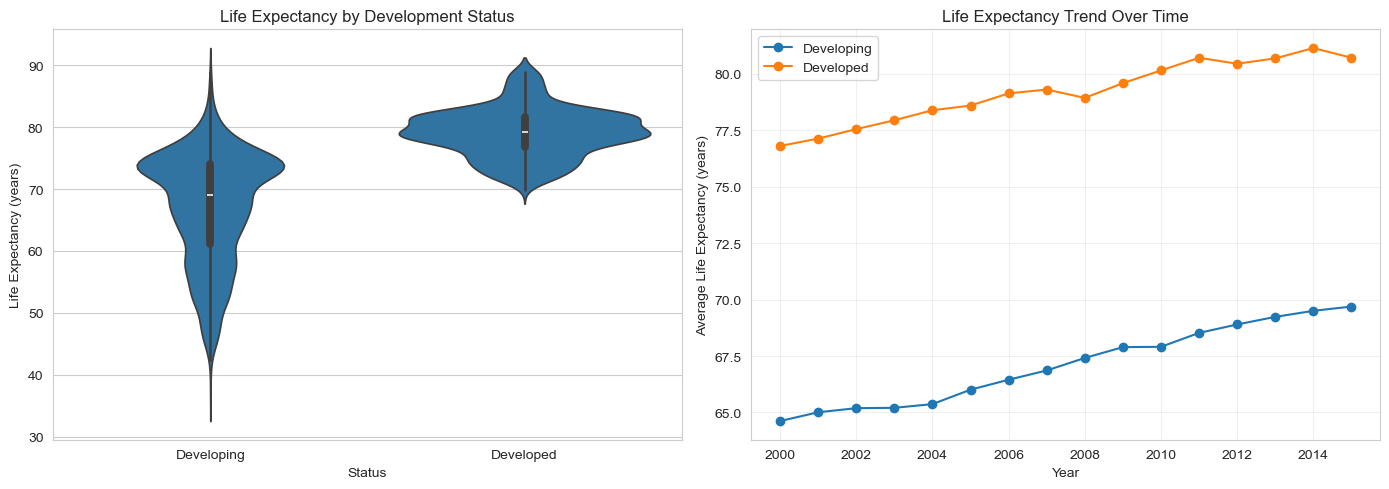

In [21]:
# Life expectancy by Status
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Violin plot
sns.violinplot(data=df_clean, x='Status', y='Life expectancy', ax=axes[0])
axes[0].set_title('Life Expectancy by Development Status')
axes[0].set_ylabel('Life Expectancy (years)')

# Trend over time
life_exp_trend = df_clean.groupby(['Year', 'Status'])['Life expectancy'].mean().reset_index()
for status in df_clean['Status'].unique():
    data = life_exp_trend[life_exp_trend['Status'] == status]
    axes[1].plot(data['Year'], data['Life expectancy'], marker='o', label=status)
axes[1].set_xlabel('Year')
axes[1].set_ylabel('Average Life Expectancy (years)')
axes[1].set_title('Life Expectancy Trend Over Time')
axes[1].legend()
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('/Users/bikki/Documents/Projects_Spring_2026/STATS201/images/life_expectancy_by_status.png', dpi=300, bbox_inches='tight')
plt.show()

### Correlations


In [22]:
# Select numerical features for correlation analysis
numerical_features = df_clean.select_dtypes(include=[np.number]).columns.tolist()
numerical_features = [col for col in numerical_features if col != 'Year']  # Exclude Year

# Calculate correlations with target
correlations = df_clean[numerical_features].corr()['Life expectancy'].sort_values(ascending=False)

print("Top 15 Features Correlated with Life Expectancy:")
print(correlations.head(15).to_string())

print("Bottom 10 Features (Negative Correlation):")
print(correlations.tail(10).to_string())

Top 15 Features Correlated with Life Expectancy:
Life expectancy                    1.000000
Life_Expectancy_Lag_1              0.981296
Life_Expectancy_Lag_2              0.972843
Life_Expectancy_Lag_3              0.965882
Life_Expectancy_RollingMean_3yr    0.899371
Life_Expectancy_RollingMean_5yr    0.856162
Schooling                          0.751975
Income composition of resources    0.724776
BMI                                0.567694
Status_Encoded                     0.482136
Diphtheria                         0.479495
Polio                              0.465556
GDP                                0.461455
Alcohol                            0.404877
percentage expenditure             0.381864
Bottom 10 Features (Negative Correlation):
Years_Since_2000              0.170033
Life_Expectancy_YoY_Change   -0.018958
Population                   -0.021538
Measles                      -0.157586
infant deaths                -0.196557
under-five deaths            -0.222529
thinness 5-9 y

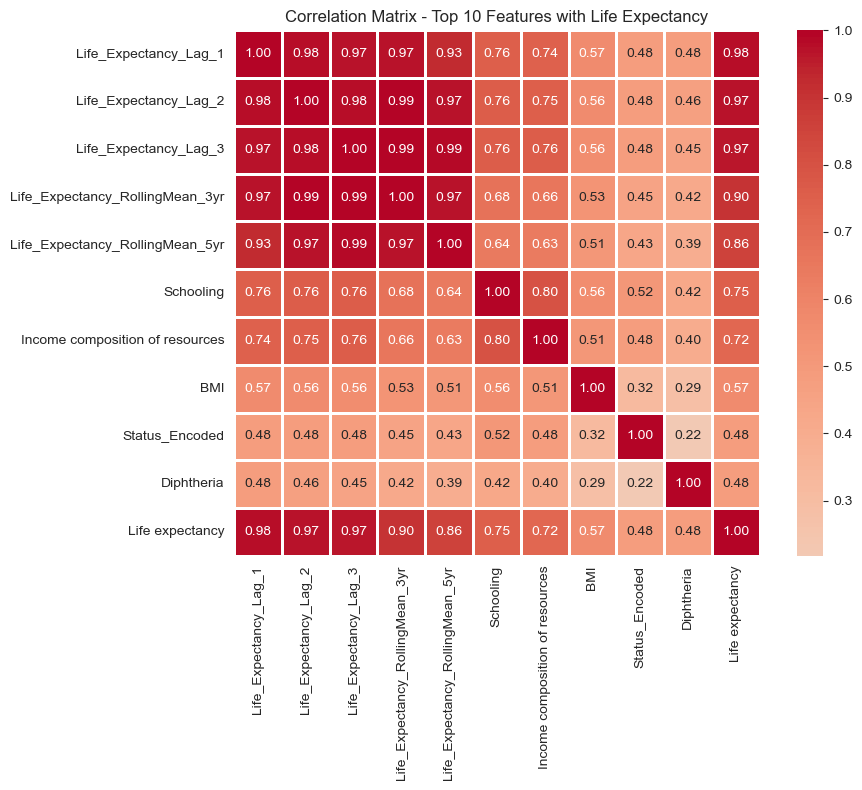

In [23]:
# Visualize top correlations
top_features = correlations.head(11).index.tolist()  # Top 10 + target itself
top_features.remove('Life expectancy')  # Remove target from list

plt.figure(figsize=(10, 8))
correlation_matrix = df_clean[top_features + ['Life expectancy']].corr()
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', 
            center=0, square=True, linewidths=1)
plt.title('Correlation Matrix - Top 10 Features with Life Expectancy')
plt.tight_layout()
plt.savefig('/Users/bikki/Documents/Projects_Spring_2026/STATS201/images/correlation_matrix_top10.png', dpi=300, bbox_inches='tight')
plt.show()

### Distributions


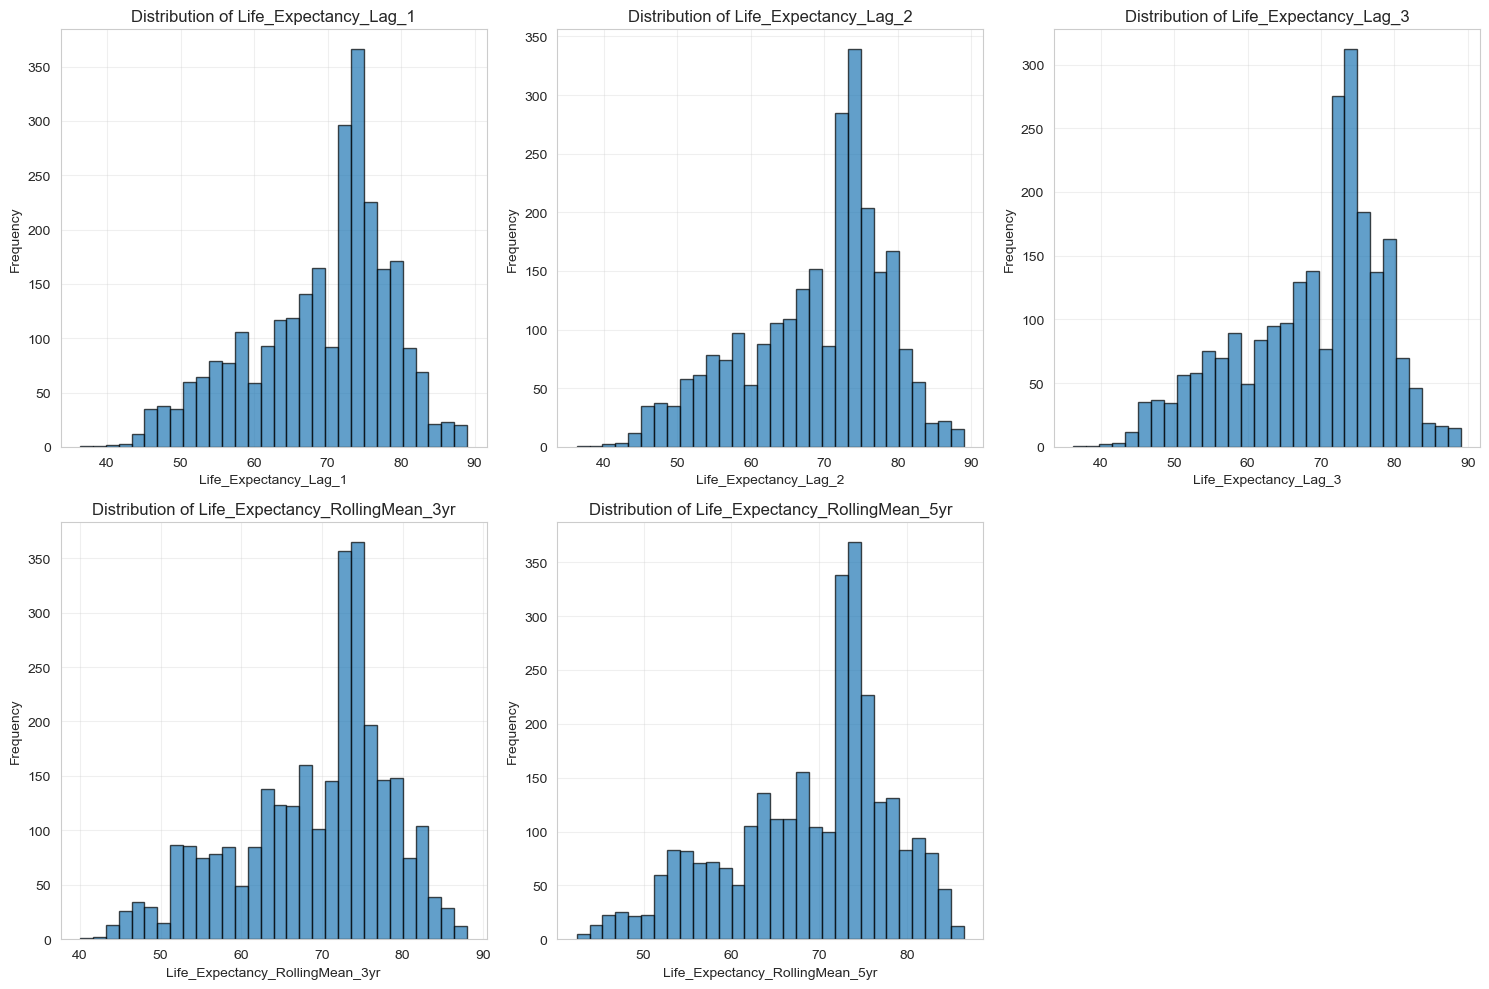

In [24]:
# Plot distributions of top features
top_5_features = correlations.head(6).index.tolist()
top_5_features.remove('Life expectancy')

fig, axes = plt.subplots(2, 3, figsize=(15, 10))
axes = axes.ravel()

for idx, feature in enumerate(top_5_features):
    axes[idx].hist(df_clean[feature], bins=30, edgecolor='black', alpha=0.7)
    axes[idx].set_xlabel(feature)
    axes[idx].set_ylabel('Frequency')
    axes[idx].set_title(f'Distribution of {feature}')
    axes[idx].grid(True, alpha=0.3)

# Remove empty subplot
if len(top_5_features) < 6:
    fig.delaxes(axes[-1])

plt.tight_layout()
plt.savefig('/Users/bikki/Documents/Projects_Spring_2026/STATS201/images/top_features_distributions.png', dpi=300, bbox_inches='tight')
plt.show()

### Scatter Plots


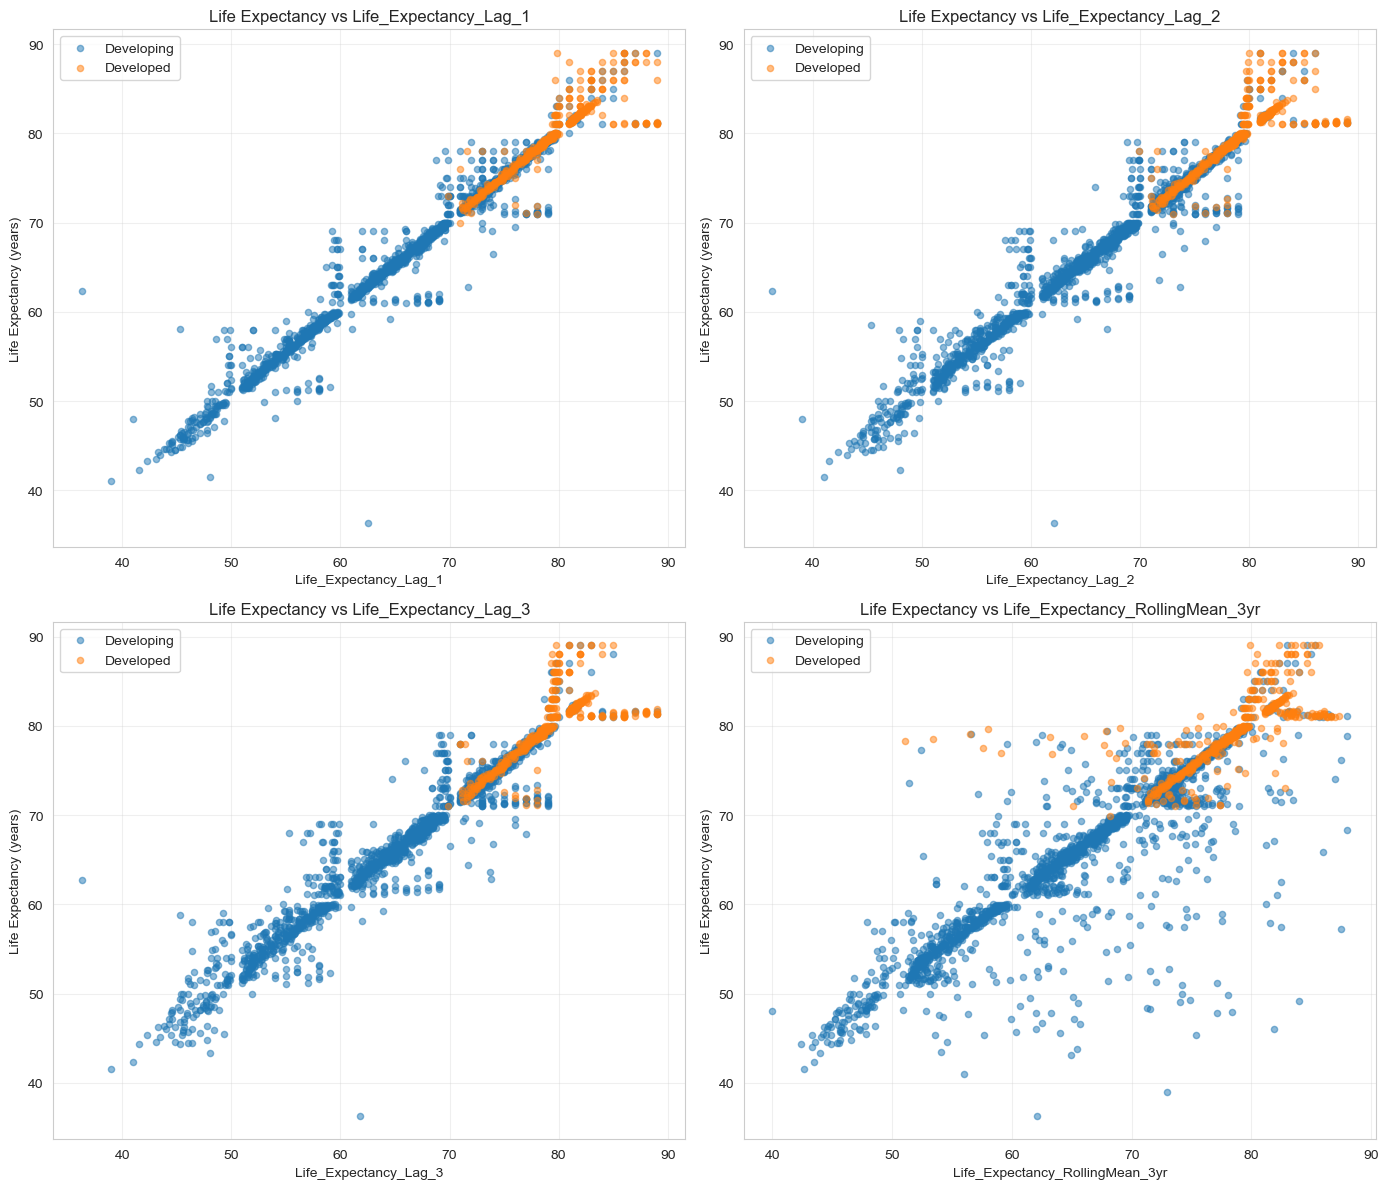

In [25]:
# Create scatter plots for most correlated features
top_4_positive = [col for col in correlations.head(5).index.tolist() if col != 'Life expectancy'][:4]

fig, axes = plt.subplots(2, 2, figsize=(14, 12))
axes = axes.ravel()

for idx, feature in enumerate(top_4_positive):
    for status in df_clean['Status'].unique():
        data = df_clean[df_clean['Status'] == status]
        axes[idx].scatter(data[feature], data['Life expectancy'], 
                         alpha=0.5, label=status, s=20)
    
    axes[idx].set_xlabel(feature)
    axes[idx].set_ylabel('Life Expectancy (years)')
    axes[idx].set_title(f'Life Expectancy vs {feature}')
    axes[idx].legend()
    axes[idx].grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('/Users/bikki/Documents/Projects_Spring_2026/STATS201/images/scatter_plots_top_features.png', dpi=300, bbox_inches='tight')
plt.show()

## Data Quality Summary


In [26]:
print("FINAL CLEANED DATASET SUMMARY")
print(f"Original dataset size: {df.shape[0]} observations, {df.shape[1]} features")
print(f"Cleaned dataset size: {df_clean.shape[0]} observations, {df_clean.shape[1]} features")
print(f"Observations removed: {df.shape[0] - df_clean.shape[0]} ({((df.shape[0] - df_clean.shape[0])/df.shape[0]*100):.2f}%)")
print(f"\nMissing values: {df_clean.isnull().sum().sum()}")
print(f"Duplicates: {df_clean.duplicated().sum()}")

print("DATASET CHARACTERISTICS:")
print(f"Countries: {df_clean['Country'].nunique()}")
print(f"Years covered: {df_clean['Year'].min()} - {df_clean['Year'].max()}")
print(f"Developed countries-year: {(df_clean['Status'] == 'Developed').sum()}")
print(f"Developing countries-year: {(df_clean['Status'] == 'Developing').sum()}")

print("TARGET VARIABLE (Life expectancy):")
print(f"Mean: {df_clean['Life expectancy'].mean():.2f} years")
print(f"Median: {df_clean['Life expectancy'].median():.2f} years")
print(f"Std Dev: {df_clean['Life expectancy'].std():.2f} years")
print(f"Range: {df_clean['Life expectancy'].min():.2f} - {df_clean['Life expectancy'].max():.2f} years")

print("FEATURE TYPES:")
print(f"Numerical features: {len(df_clean.select_dtypes(include=[np.number]).columns)}")
print(f"Categorical features: {len(df_clean.select_dtypes(include=['object']).columns)}")

FINAL CLEANED DATASET SUMMARY
Original dataset size: 2938 observations, 22 features
Cleaned dataset size: 2928 observations, 30 features
Observations removed: 10 (0.34%)

Missing values: 3797
Duplicates: 0
DATASET CHARACTERISTICS:
Countries: 183
Years covered: 2000 - 2015
Developed countries-year: 512
Developing countries-year: 2416
TARGET VARIABLE (Life expectancy):
Mean: 69.22 years
Median: 72.10 years
Std Dev: 9.52 years
Range: 36.30 - 89.00 years
FEATURE TYPES:
Numerical features: 28
Categorical features: 2


## Final Dataset


In [27]:
# Create final dataset with selected features
# Keep Country and Year for reference but they won't be used in modeling

# List all columns
print("Columns in cleaned dataset:")
for idx, col in enumerate(df_clean.columns, 1):
    print(f"{idx:2d}. {col}")

# Verify data types
print("Data types:")
print(df_clean.dtypes)

Columns in cleaned dataset:
 1. Country
 2. Year
 3. Status
 4. Life expectancy
 5. Adult Mortality
 6. infant deaths
 7. Alcohol
 8. percentage expenditure
 9. Hepatitis B
10. Measles
11. BMI
12. under-five deaths
13. Polio
14. Total expenditure
15. Diphtheria
16. HIV/AIDS
17. GDP
18. Population
19. thinness  1-19 years
20. thinness 5-9 years
21. Income composition of resources
22. Schooling
23. Status_Encoded
24. Years_Since_2000
25. Life_Expectancy_Lag_1
26. Life_Expectancy_Lag_2
27. Life_Expectancy_Lag_3
28. Life_Expectancy_RollingMean_3yr
29. Life_Expectancy_RollingMean_5yr
30. Life_Expectancy_YoY_Change
Data types:
Country                             object
Year                                 int64
Status                              object
Life expectancy                    float64
Adult Mortality                    float64
infant deaths                        int64
Alcohol                            float64
percentage expenditure             float64
Hepatitis B                

In [28]:
# Final check for data quality
print("Final Data Quality Checks:")
print(f"Missing values: {df_clean.isnull().sum().sum()}")
print(f"Duplicates: {df_clean.duplicated(subset=['Country', 'Year']).sum()}")
print(f"Negative values in non-negative features: ", end="")

# Check for negative values in features that should be non-negative
non_negative_cols = ['Adult Mortality', 'infant deaths', 'Alcohol', 'percentage expenditure',
                     'Hepatitis B', 'Measles', 'BMI', 'under-five deaths', 'Polio',
                     'Total expenditure', 'Diphtheria', 'HIV/AIDS', 'GDP', 'Population',
                     'thinness  1-19 years', 'thinness 5-9 years', 'Income composition of resources',
                     'Schooling']

negative_counts = 0
for col in non_negative_cols:
    if col in df_clean.columns:
        neg_count = (df_clean[col] < 0).sum()
        negative_counts += neg_count
        if neg_count > 0:
            print(f"\n  - {col}: {neg_count} negative values")

if negative_counts == 0:
    print("0")

print(f"\nDataset saved (imputation in modeling): {len(df_clean)} observations")

Final Data Quality Checks:
Missing values: 3797
Duplicates: 0
Negative values in non-negative features: 0

Dataset saved (imputation in modeling): 2928 observations


## Save Dataset


In [29]:
# Save cleaned dataset
output_file = '/Users/bikki/Documents/Projects_Spring_2026/STATS201/CSV outputs/clean_dataset.csv'
df_clean.to_csv(output_file, index=False)

print(f"Cleaned dataset saved to: {output_file}")
print(f"Shape: {df_clean.shape}")
print(f"\nDataset is ready for Week 3: Baseline Models & Evaluation")

Cleaned dataset saved to: /Users/bikki/Documents/Projects_Spring_2026/STATS201/CSV outputs/clean_dataset.csv
Shape: (2928, 30)

Dataset is ready for Week 3: Baseline Models & Evaluation
